In [2]:
import pandas as pd
%matplotlib inline

In [3]:
dfl = pd.read_csv('../za_sample_listings_incl_cat.csv', index_col='item_id')

In [4]:
dfl.columns

Index(['Unnamed: 0', 'seller_id', 'listing_title', 'listing_description',
       'listing_price', 'category_sk', 'category_l1_name_en',
       'category_l2_name_en', 'category_l3_name_en', 'listing_latitude',
       'listing_longitude'],
      dtype='object')

In [5]:
dfl.head()

,Unnamed: 0,seller_id,listing_title,listing_description,listing_price,category_sk,category_l1_name_en,category_l2_name_en,category_l3_name_en,listing_latitude,listing_longitude
item_id,,,,,,,,,,,
0.0,0,0,Nice wooden makes,We build all different types for sale,17500.00,olx|mea|za|806|809,"Home, Garden & Tools",Garden & Braai,Unknown,-25.43067,27.84873
1.0,1,1,A Shinning 2013 Chevrolet 1.4 Utility Bakkie w...,A Stunning accident free bargain that has just...,94890.00,olx|mea|za|362|378|2012,Vehicles,Cars & Bakkies,Chevrolet,-29.73714,31.07364
2.0,2,2,Lampshades various,A variety of lampshades in white,20.00,olx|mea|za|806|807,"Home, Garden & Tools",Furniture & Decor,Unknown,-33.88159,18.55522
3.0,3,3,Toyota Corolla,"Toyota Corolla 1.3 Professional, Front Electri...",63995.00,olx|mea|za|362|378|2067,Vehicles,Cars & Bakkies,Toyota,-26.10757,28.05670
4.0,4,4,bench grinder and buffer,bench grinder and.buffer...R800 for both,800.00,olx|mea|za|806|910,"Home, Garden & Tools",Tools & DIY,Unknown,-26.17190,27.91318


In [6]:
dfl.describe()

,listing_latitude,listing_longitude
count,499988.000000,499988.000000
mean,-27.920707,27.162857
std,2.964371,3.414278
min,-34.816300,16.900450
25%,-29.702790,27.648030
50%,-26.239060,28.085930
75%,-26.072610,28.322820
max,-22.381250,32.757660


Surprisingly, _listing_price_ is not included in the dataframe description.
When trying to convert the column to float we realize this is caused by the presence of some ```'Uknown'``` values:

In [7]:
sum(dfl.listing_price == 'Unknown')

11

They are just a few, so let's just get rid of them for now

In [8]:
dfl = dfl[dfl.listing_price != 'Unknown']
len(dfl)

500005

But still can't convert the column to float, because of some shifted rows ( e.g.: ```'Volkswagen'``` shows up in the price column). Let's get rid of those rows.
We will use a little helper function to get rid of those price entries that can't be converted to float.

In [9]:
def is_float(x):
    try:
        float(x)
        return True
    except Exception:
        return False

In [10]:
is_float('2.12'), is_float('2.12a'), is_float('Volkswagen')

(True, False, False)

In [11]:
arefloats = dfl.listing_price.apply(is_float)

In [12]:
sum(arefloats)

500004

It was actually just one row! :)

In [13]:
dfl = dfl[arefloats]
dfl.listing_price = dfl.listing_price.astype(float)

In [14]:
dfl.describe()

,listing_price,listing_latitude,listing_longitude
count,4.918780e+05,499988.000000,499988.000000
mean,1.383485e+08,-27.920707,27.162857
std,3.028575e+10,2.964371,3.414278
min,0.000000e+00,-34.816300,16.900450
25%,9.500000e+02,-29.702790,27.648030
50%,4.500000e+03,-26.239060,28.085930
75%,4.500000e+04,-26.072610,28.322820
max,1.000000e+13,-22.381250,32.757660


## Exploring category distribution

In [15]:
dfl.category_l1_name_en = dfl.category_l1_name_en.astype(str)

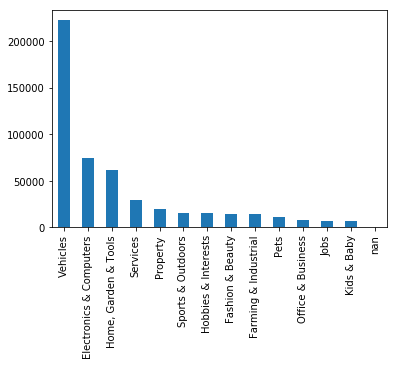

In [16]:
dfl.category_l1_name_en.value_counts().plot(kind='bar')

In [17]:
dfl.category_l1_name_en.value_counts()

Vehicles                   222198
Electronics & Computers     74478
Home, Garden & Tools        61722
Services                    28892
Property                    19753
Sports & Outdoors           15712
Hobbies & Interests         15178
Fashion & Beauty            14449
Farming & Industrial        14376
Pets                        11337
Office & Business            8146
Jobs                         7277
Kids & Baby                  6470
nan                            16
Name: category_l1_name_en, dtype: int64

## Level 2 categories

In [18]:
dfl.category_l2_name_en.value_counts()

Cars & Bakkies                           155154
Car Parts & Accessories                   37307
Furniture & Decor                         31555
Cell Phones                               28266
Homeware & Appliances                     15303
Motorcycles & Scooters                    13982
Construction & Home Improvement           12153
Gaming & Consoles                         11468
TV, Audio & Visual                        11323
Computers & Laptops                       10876
Outdoor & Sports Equipment                 9465
Houses & Flats for rent                    9333
Tools & DIY                                9162
Trucks & Commercial Vehicles               8677
Other Services                             7334
Dogs & Cats                                7170
Business & Industrial Equipment            6871
Clothing & Shoes                           6694
Computer Hardware & Accessories            6327
Garden & Braai                             5702
Art, Collectibles & Rare Items          

## Level 3 categories

In [22]:
dfl.category_l3_name_en.value_counts()

Unknown              317585
Toyota                30718
Volkswagen            28651
Other                 13931
Ford                  12544
BMW                    9999
Opel                   9966
Nissan                 9375
Mercedes-Benz          7651
Hyundai                6702
Mazda                  5287
Isuzu                  5257
Honda                  4811
Audi                   4267
Chevrolet              3425
Fiat                   2972
Renault                2878
Kia                    2487
Suzuki                 2190
Mitsubishi             1834
Yamaha                 1723
Jeep                   1407
Land Rover             1380
Peugeot                1047
Kawasaki               1015
Volvo                  1004
Tata                    841
Mini                    833
Citroen                 619
Daihatsu                489
                      ...  
Weippert                  1
Ammann                    1
Eicher                    1
Doll                      1
Zettelmeyer         

Let's keep only the large enough ones

In [24]:
l3vcs = dfl.category_l3_name_en.value_counts()
l3vcs[l3vcs > 50]

Unknown             317585
Toyota               30718
Volkswagen           28651
Other                13931
Ford                 12544
BMW                   9999
Opel                  9966
Nissan                9375
Mercedes-Benz         7651
Hyundai               6702
Mazda                 5287
Isuzu                 5257
Honda                 4811
Audi                  4267
Chevrolet             3425
Fiat                  2972
Renault               2878
Kia                   2487
Suzuki                2190
Mitsubishi            1834
Yamaha                1723
Jeep                  1407
Land Rover            1380
Peugeot               1047
Kawasaki              1015
Volvo                 1004
Tata                   841
Mini                   833
Citroen                619
Daihatsu               489
                     ...  
Freightliner           233
Jaguar                 192
Dodge                  190
CI International       189
Subaru                 184
Lexus                  178
P

Note: a quick exploration suggests that ```category_sk``` column contains codes for the 3-levels of categories, next to some additional (fixed) tags for the site and location. We decide to ignore this column, as it seems to be redundant.

## Geo coordinates

In [18]:
dfl[['listing_latitude', 'listing_longitude']].describe()

,listing_latitude,listing_longitude
count,499988.000000,499988.000000
mean,-27.920707,27.162857
std,2.964371,3.414278
min,-34.816300,16.900450
25%,-29.702790,27.648030
50%,-26.239060,28.085930
75%,-26.072610,28.322820
max,-22.381250,32.757660


We can plot extreme lat/lon values to make sure the geo coordinates are correct:

https://www.darrinward.com/lat-long/?id=59e0cd32882c32.40619640

![](./imgs/geo.png)

Both extreme latitudes and extreme longitudes look fine.
Note that for simplicity we plotted both mins in the same point, and same for max values, but those points are not actually locations in our data. What's important here is to see min/max latitudes and min/max longitudes make sense.

# Search keywords

In [4]:
df_keywords = pd.read_csv('../za_queries_sample.csv')

In [8]:
df_keywords

,Unnamed: 0,search_term,cnt
0,0,polo,133394
1,1,golf,124172
2,2,isuzu,121043
3,3,bmw,109099
4,4,toyota corolla,107486
5,5,toyota,99802
6,6,hilux,95592
7,7,toyota tazz,94877
8,8,cars,93824
9,9,bakkie,89243
